In [2]:

import ibmos2spark

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': 'b253e4f72e7446699c05f6a72f4d9b2a',
    'region': 'dallas',
    'user_id': 'a96927c5d46b4635b65a5343ff797167',
    'username': 'member_e702b6a15bf4fe0dd0bc46c315116c7f0296b6ef',
    'password': 'eHXWY0Y*)bO8Off&'
}

configuration_name = 'os_5af4beb9b9084580b5b3df962e474145_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
air_quality = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(bmos.url('AirQuality', 'annual_conc_by_monitor_2017.csv'))
air_quality.take(5)


[Row(State Code=u'01', County Code=u'003', Site Num=u'0010', Parameter Code=u'44201', POC=u'1', Latitude=u'30.497478', Longitude=u'-87.880258', Datum=u'NAD83', Parameter Name=u'Ozone', Sample Duration=u'1 HOUR', Pollutant Standard=u'Ozone 1-hour Daily 2005', Metric Used=u'Daily maxima of observed hourly values (between 9:00 AM and 8:00 PM)', Method Name=u'INSTRUMENTAL - ULTRA VIOLET ABSORPTION', Year=u'2017', Units of Measure=u'Parts per million', Event Type=u'No Events', Observation Count=u'666', Observation Percent=u'12', Completeness Indicator=u'N', Valid Day Count=u'29', Required Day Count=u'245', Exceptional Data Count=u'0', Null Data Count=u'78', Primary Exceedance Count=u'0', Secondary Exceedance Count=u'0', Certification Indicator=u'Certification not required', Num Obs Below MDL=u'0', Arithmetic Mean=u'0.049241', Arithmetic Standard Dev=u'0.008327', 1st Max Value=u'0.06', 1st Max DateTime=u'2017-03-19 15:00', 2nd Max Value=u'0.06', 2nd Max DateTime=u'2017-03-31 16:00', 3rd Max 

In [2]:
air_quality.printSchema()

root
 |-- State Code: string (nullable = true)
 |-- County Code: string (nullable = true)
 |-- Site Num: string (nullable = true)
 |-- Parameter Code: string (nullable = true)
 |-- POC: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Datum: string (nullable = true)
 |-- Parameter Name: string (nullable = true)
 |-- Sample Duration: string (nullable = true)
 |-- Pollutant Standard: string (nullable = true)
 |-- Metric Used: string (nullable = true)
 |-- Method Name: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Units of Measure: string (nullable = true)
 |-- Event Type: string (nullable = true)
 |-- Observation Count: string (nullable = true)
 |-- Observation Percent: string (nullable = true)
 |-- Completeness Indicator: string (nullable = true)
 |-- Valid Day Count: string (nullable = true)
 |-- Required Day Count: string (nullable = true)
 |-- Exceptional Data Count: string (nullable = true)
 |-- Null D

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# matplotlib.patches allows us create colored patches, we can use for legends in plots
import matplotlib.patches as mpatches
# seaborn also builds on matplotlib and adds graphical features and new plot types
#adjust settings
%matplotlib inline
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 12)

In [11]:
airQuality_df = air_quality
airQuality_pd = airQuality_df[airQuality_df['LATITUDE'] != 0][['Parameter Code','Latitude', 'Longitude', 'Datum', 'Parameter Name',
                                                               'Sample Duration', 'Pollutant Standard', 'Metric Used',
                                                               'Year', 'Observation Count', 'Completeness Indicator',
                                                               'Local Site Name', 'State Name', 'County Name', 'Date of Last Change']].toPandas()

airQuality_pd.columns = ['Parameter Code','Latitude', 'Longitude', 'Datum', 'Parameter Name',
                                                               'Sample Duration', 'Pollutant Standard', 'Metric Used',
                                                               'Year', 'Observation Count', 'Completeness Indicator',
                                                               'Local Site Name', 'State Name', 'County Name', 'Date of Last Change']

airQuality_pd['Parameter Code'] = airQuality_pd['Parameter Code'].astype(int) 
airQuality_pd['Latitude'] = airQuality_pd['Latitude'].astype(float)
airQuality_pd['Longitude'] = airQuality_pd['Longitude'].astype(float)
airQuality_pd['Year'] = airQuality_pd['Year'].astype(int)
airQuality_pd['Observation Count'] = airQuality_pd['Observation Count'].astype(int)
airQuality_pd['Completeness Indicator'] = airQuality_pd['Completeness Indicator'].astype(bool)

airQuality_pd['Parameter Code'].unique()


array([44201, 88101, 88502, 42101, 42401, 42406, 42600, 42601, 42602,
       42603, 61103, 61104, 62101, 62201, 63301, 64101, 65102, 68102,
       68105, 68108, 81102, 85101, 86101, 68101, 68103, 68104, 68106,
       68107, 68109, 88501, 61101, 61106, 14129, 61102, 62106, 88503,
       63302, 61111, 43207, 43218, 43302, 43551, 43552, 43702, 43704,
       43802, 43803, 43804, 43811, 43814, 43815, 43817, 43824, 43843,
       43860, 45109, 45201, 45202, 45203, 45204, 84313, 12102, 12103,
       12105, 12110, 12112, 12113, 12114, 12126, 12128, 12132, 12134,
       12136, 12154, 12160, 12161, 12164, 12167, 12168, 12185, 43505,
       43819, 43830, 43831, 45220, 88301, 88302, 88303, 88306, 88403,
       42402, 88355, 88357, 88370, 88374, 88375, 88376, 88377, 88378,
       88380, 88383, 88384, 88385, 88388, 61105, 62103, 62102, 43102,
       11201, 11203, 85102, 85103, 85104, 85107, 85109, 85111, 85112,
       85113, 85114, 85115, 85126, 85128, 85132, 85134, 85136, 85142,
       85152, 85154,

In [4]:
airQuality_df = air_quality
airQuality_pd = airQuality_df[airQuality_df['LATITUDE'] != 0][['Parameter Code','Latitude', 'Longitude', 'Datum', 'Parameter Name',
                                                               'Sample Duration', 'Pollutant Standard', 'Metric Used',
                                                               'Year', 'Observation Count', 'Completeness Indicator',
                                                               'Local Site Name', 'State Name', 'County Name', 'Date of Last Change']].toPandas()

airQuality_pd.columns = ['Parameter Code','Latitude', 'Longitude', 'Datum', 'Parameter Name',
                                                               'Sample Duration', 'Pollutant Standard', 'Metric Used',
                                                               'Year', 'Observation Count', 'Completeness Indicator',
                                                               'Local Site Name', 'State Name', 'County Name', 'Date of Last Change']

airQuality_pd['Parameter Code'] = airQuality_pd['Parameter Code'].astype(float) 
airQuality_pd['Latitude'] = airQuality_pd['Latitude'].astype(float)
airQuality_pd['Longitude'] = airQuality_pd['Longitude'].astype(float)
airQuality_pd['Year'] = airQuality_pd['Year'].astype(float)
airQuality_pd['Observation Count'] = airQuality_pd['Observation Count'].astype(float)
airQuality_pd['Completeness Indicator'] = airQuality_pd['Completeness Indicator'].astype(bool)

ozone_pd = airQuality_pd[airQuality_pd['Parameter Code']==44201]
pm25_local_conditions_pd = airQuality_pd[airQuality_pd['Parameter Code']==88101]
acceptable_pm25_AQI_speciation_mass_pd = airQuality_pd[airQuality_pd['Parameter Code']==88502]
CO3_pd = airQuality_pd[airQuality_pd['Parameter Code']==42101]

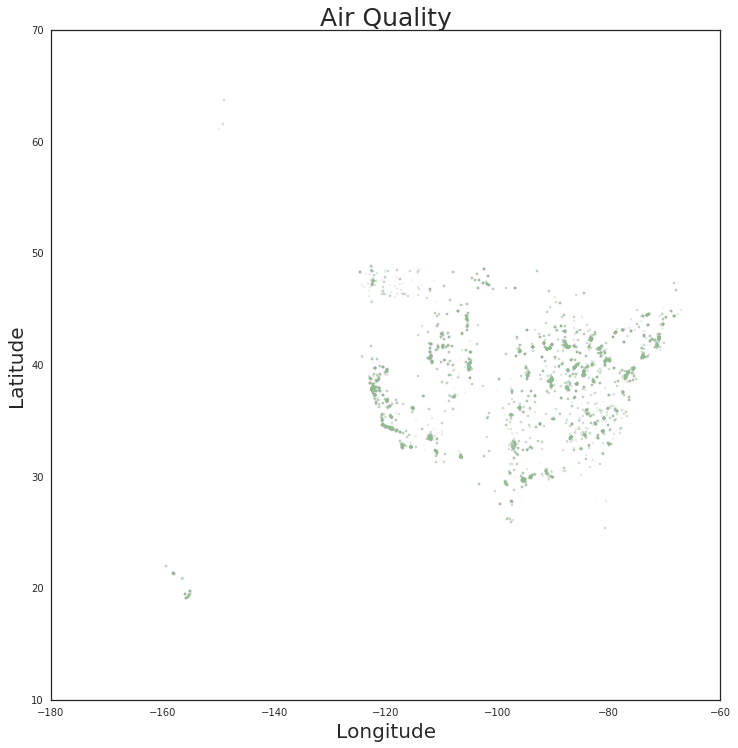

In [13]:
plt.scatter(airQuality_pd.Longitude, airQuality_pd.Latitude, alpha=0.05, s=4, color='darkseagreen')

#adjust more settings
plt.title('Air Quality', size=25)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

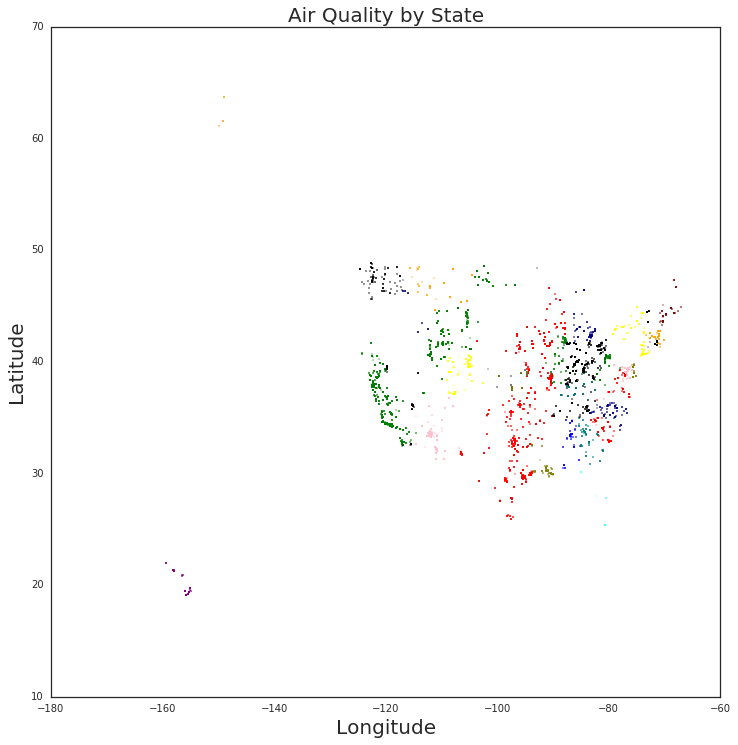

In [10]:
alabama = airQuality_pd[airQuality_pd['State Name']=='Alabama']
alaska = airQuality_pd[airQuality_pd['State Name']=='Alaska']
arizona = airQuality_pd[airQuality_pd['State Name']=='Arizona']
arkansas = airQuality_pd[airQuality_pd['State Name']=='Arkansas'] 
california = airQuality_pd[airQuality_pd['State Name']=='California'] 
california = airQuality_pd[airQuality_pd['State Name']=='California'] 
colorado = airQuality_pd[airQuality_pd['State Name']=='Colorado'] 
colorado = airQuality_pd[airQuality_pd['State Name']=='Colorado'] 
connecticut = airQuality_pd[airQuality_pd['State Name']=='Connecticut'] 
delaware = airQuality_pd[airQuality_pd['State Name']=='Delaware'] 
dc = airQuality_pd[airQuality_pd['State Name']=='District Of Columbia'] 
florida = airQuality_pd[airQuality_pd['State Name']=='Florida'] 
georgia = airQuality_pd[airQuality_pd['State Name']=='Georgia'] 
hawaii = airQuality_pd[airQuality_pd['State Name']=='Hawaii'] 
idaho = airQuality_pd[airQuality_pd['State Name']=='Idaho'] 
illinois = airQuality_pd[airQuality_pd['State Name']=='Illinois'] 
indiana = airQuality_pd[airQuality_pd['State Name']=='Indiana'] 
iowa = airQuality_pd[airQuality_pd['State Name']=='Iowa'] 
kansas = airQuality_pd[airQuality_pd['State Name']=='Kansas'] 
kentucky = airQuality_pd[airQuality_pd['State Name']=='Kentucky'] 
louisiana = airQuality_pd[airQuality_pd['State Name']=='Louisiana'] 
maine = airQuality_pd[airQuality_pd['State Name']=='Maine'] 
maryland = airQuality_pd[airQuality_pd['State Name']=='Maryland'] 
massachusetts = airQuality_pd[airQuality_pd['State Name']=='Massachusetts'] 
michigan = airQuality_pd[airQuality_pd['State Name']=='Michigan'] 
minnesota = airQuality_pd[airQuality_pd['State Name']=='Minnesota'] 
missouri = airQuality_pd[airQuality_pd['State Name']=='Missouri'] 
montana = airQuality_pd[airQuality_pd['State Name']=='Montana'] 
nebraska = airQuality_pd[airQuality_pd['State Name']=='Nebraska'] 
nevada = airQuality_pd[airQuality_pd['State Name']=='Nevada'] 
newMexico = airQuality_pd[airQuality_pd['State Name']=='New Mexico'] 
newYork = airQuality_pd[airQuality_pd['State Name']=='New York'] 
northCarolina = airQuality_pd[airQuality_pd['State Name']=='North Carolina'] 
northDakota = airQuality_pd[airQuality_pd['State Name']=='North Dakota'] 
ohio = airQuality_pd[airQuality_pd['State Name']=='Ohio'] 
oklahoma = airQuality_pd[airQuality_pd['State Name']=='Oklahoma'] 
pennsylvania = airQuality_pd[airQuality_pd['State Name']=='Pennsylvania'] 
rhodeIsland = airQuality_pd[airQuality_pd['State Name']=='Rhode Island']
southCarolina = airQuality_pd[airQuality_pd['State Name']=='South Carolina'] 
southDakota = airQuality_pd[airQuality_pd['State Name']=='South Dakota'] 
tennessee = airQuality_pd[airQuality_pd['State Name']=='Tennessee'] 
texas = airQuality_pd[airQuality_pd['State Name']=='Texas'] 
utah = airQuality_pd[airQuality_pd['State Name']=='Utah'] 
vermont = airQuality_pd[airQuality_pd['State Name']=='Vermont'] 
virginia = airQuality_pd[airQuality_pd['State Name']=='Virginia'] 
washington = airQuality_pd[airQuality_pd['State Name']=='Washington'] 
westVirginia = airQuality_pd[airQuality_pd['State Name']=='West Virginia'] 
wisconsin = airQuality_pd[airQuality_pd['State Name']=='Wisconsin'] 
wyoming = airQuality_pd[airQuality_pd['State Name']=='Wyoming'] 
countryOfMexico = airQuality_pd[airQuality_pd['State Name']=='Country Of Mexico']  



plt.scatter(alabama.Longitude, alabama.Latitude,s=1, color='blue', marker ='.')
plt.scatter(alaska.Longitude, alaska.Latitude,s=1, color='orange', marker ='.')
plt.scatter(arizona.Longitude, arizona.Latitude,s=1, color='pink', marker ='.')
plt.scatter(arkansas.Longitude, arkansas.Latitude,s=1, color='red', marker ='.')
plt.scatter(california.Longitude, california.Latitude, s=1, color='green', marker ='.')

plt.scatter(colorado.Longitude, colorado.Latitude, s=1, color='yellow', marker ='.')
plt.scatter(connecticut.Longitude, connecticut.Latitude, color='purple', s=1, marker ='.')
plt.scatter(delaware.Longitude, delaware.Latitude, s=1, color='olive', marker ='.')
plt.scatter(dc.Longitude, dc.Latitude, s=1, color='maroon', marker ='.')

plt.scatter(florida.Longitude, florida.Latitude, color='aqua', s=1, marker ='.')
plt.scatter(georgia.Longitude, georgia.Latitude, s=1, color='teal', marker ='.')
plt.scatter(hawaii.Longitude, hawaii.Latitude, s=1, color='purple', marker ='.')

plt.scatter(idaho.Longitude, idaho.Latitude, color='navy', s=1, marker ='.')
plt.scatter(illinois.Longitude, illinois.Latitude, s=1, color='green', marker ='.')
plt.scatter(indiana.Longitude, indiana.Latitude, s=1, color='black', marker ='.')


plt.scatter(iowa.Longitude, iowa.Latitude, color='red', s=1, marker ='.')
plt.scatter(kansas.Longitude, kansas.Latitude, s=1, color='blue', marker ='.')
plt.scatter(kentucky.Longitude, kentucky.Latitude, s=1, color='red', marker ='.')


plt.scatter(louisiana.Longitude, louisiana.Latitude, color='olive', s=1, marker ='.')
plt.scatter(maine.Longitude, maine.Latitude, s=1, color='maroon', marker ='.')
plt.scatter(maryland.Longitude, maryland.Latitude, s=1, color='pink', marker ='.')


plt.scatter(massachusetts.Longitude, massachusetts.Latitude, color='orange', s=1, marker ='.')
plt.scatter(michigan.Longitude, michigan.Latitude, s=1, color='navy', marker ='.')
plt.scatter(missouri.Longitude, missouri.Latitude, s=1, color='red', marker ='.')

plt.scatter(iowa.Longitude, iowa.Latitude, color='red', s=1, marker ='.')
plt.scatter(kansas.Longitude, kansas.Latitude, s=1, color='olive', marker ='.')
plt.scatter(kentucky.Longitude, kentucky.Latitude, s=1, color='teal', marker ='.')


plt.scatter(minnesota.Longitude, minnesota.Latitude, color='silver', s=1, marker ='.')
plt.scatter(montana.Longitude, montana.Latitude, s=1, color='orange', marker ='.')
plt.scatter(nebraska.Longitude, nebraska.Latitude, s=1, color='red', marker ='.')


plt.scatter(nevada.Longitude, nevada.Latitude, color='black', s=1, marker ='.')
plt.scatter(newMexico.Longitude, newMexico.Latitude, s=1, color='pink', marker ='.')
plt.scatter(newYork.Longitude, newYork.Latitude, s=1, color='yellow', marker ='.')

plt.scatter(northCarolina.Longitude, northCarolina.Latitude, color='navy', s=1, marker ='.')
plt.scatter(northDakota.Longitude, northDakota.Latitude, s=1, color='green', marker ='.')
plt.scatter(ohio.Longitude, ohio.Latitude, s=1, color='black', marker ='.')

plt.scatter(oklahoma.Longitude, oklahoma.Latitude, color='red', s=1, marker ='.')
plt.scatter(pennsylvania.Longitude, pennsylvania.Latitude, s=1, color='green', marker ='.')
plt.scatter(rhodeIsland.Longitude, rhodeIsland.Latitude, s=1, color='black', marker ='.')

plt.scatter(southCarolina.Longitude, southCarolina.Latitude, color='red', s=1, marker ='.')
plt.scatter(southDakota.Longitude, southDakota.Latitude, s=1, color='green', marker ='.')
plt.scatter(tennessee.Longitude, tennessee.Latitude, s=1, color='black', marker ='.')

plt.scatter(texas.Longitude, texas.Latitude, color='red', s=1, marker ='.')
plt.scatter(utah.Longitude, utah.Latitude, s=1, color='green', marker ='.')
plt.scatter(vermont.Longitude, vermont.Latitude, s=1, color='black', marker ='.')

plt.scatter(virginia.Longitude, virginia.Latitude, color='red', s=1, marker ='.')
plt.scatter(westVirginia.Longitude, westVirginia.Latitude, s=1, color='green', marker ='.')
plt.scatter(washington.Longitude, washington.Latitude, s=1, color='black', marker ='.')

plt.scatter(wisconsin.Longitude, wisconsin.Latitude, color='red', s=1, marker ='.')
plt.scatter(wyoming.Longitude, wyoming.Latitude, s=1, color='green', marker ='.')
plt.scatter(countryOfMexico.Longitude, countryOfMexico.Latitude, s=1, color='black', marker ='.')


plt.title('Air Quality by State', size=20)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()



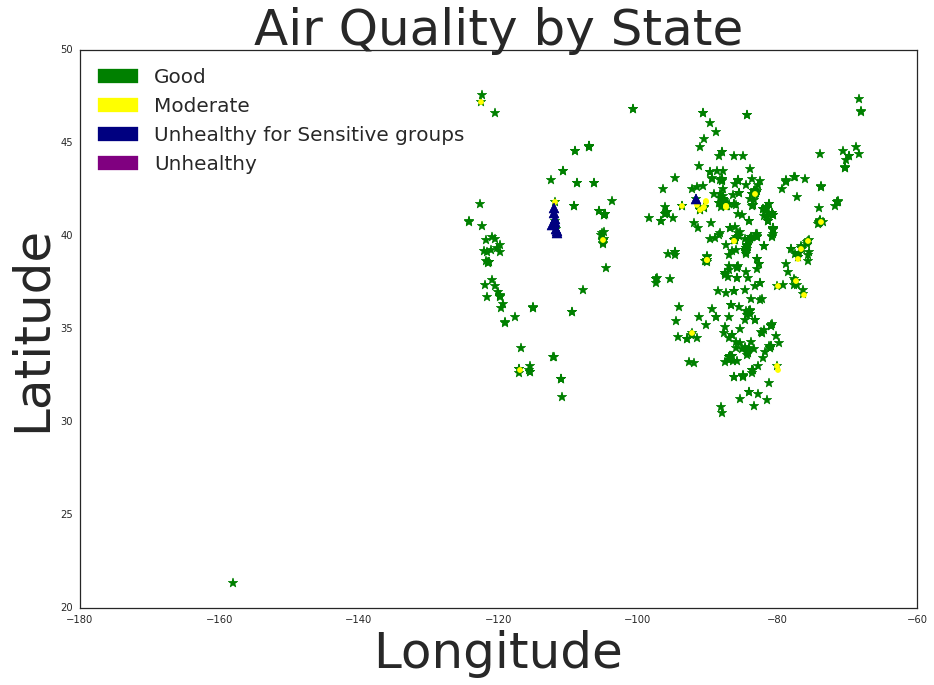

In [39]:
airQuality_pd['Observation Count'] = airQuality_pd['Observation Count'].astype(int)

alabama_25_Local_Conditions_filter1 = airQuality_pd[np.logical_and(airQuality_pd['Observation Count'] < 302, airQuality_pd['Parameter Name']=='PM2.5 - Local Conditions')]
alabama_25_Local_Conditions_filter2 = alabama_25_Local_Conditions_filter1[np.logical_and(alabama_25_Local_Conditions_filter1['Metric Used']=='Daily Mean', alabama_25_Local_Conditions_filter1['Sample Duration']=='24 HOUR')]

allStates_good = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] < 51,alabama_25_Local_Conditions_filter2['Observation Count'] < 51)]
allStates_moderate = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] > 51,alabama_25_Local_Conditions_filter2['Observation Count'] < 101)]
allStates_USG = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] > 101,alabama_25_Local_Conditions_filter2['Observation Count'] < 151)]
allStates_Unhealthy = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] > 150,alabama_25_Local_Conditions_filter2['Observation Count'] < 201)]

#size
plt.figure(figsize=(15,10))

#legend
green_patch = mpatches.Patch( label='Good', color='Green')
yellow_patch = mpatches.Patch(color='yellow', label='Moderate')
navy_patch = mpatches.Patch(color='navy', label='Unhealthy for Sensitive groups')
purple_patch = mpatches.Patch(color='purple', label='Unhealthy')
plt.legend([green_patch, yellow_patch, navy_patch, purple_patch],('Good', 'Moderate', 'Unhealthy for Sensitive groups', 'Unhealthy'), 
           loc='upper left', prop={'size':20})

#plot
plt.scatter(allStates_good.Longitude, allStates_good.Latitude, color='green', s=100, marker ='*')
plt.scatter(allStates_moderate.Longitude, allStates_moderate.Latitude, color='yellow', s=100, marker  = '.')
plt.scatter(allStates_USG.Longitude, allStates_USG.Latitude, color='navy', s=100, marker  = '^')
plt.scatter(allStates_Unhealthy.Longitude, allStates_Unhealthy.Latitude, color='purple', s=100, marker  = 'v')

plt.title('Air Quality by State', size=50)
plt.xlabel('Longitude',size=50)
plt.ylabel('Latitude',size=50)
plt.show()


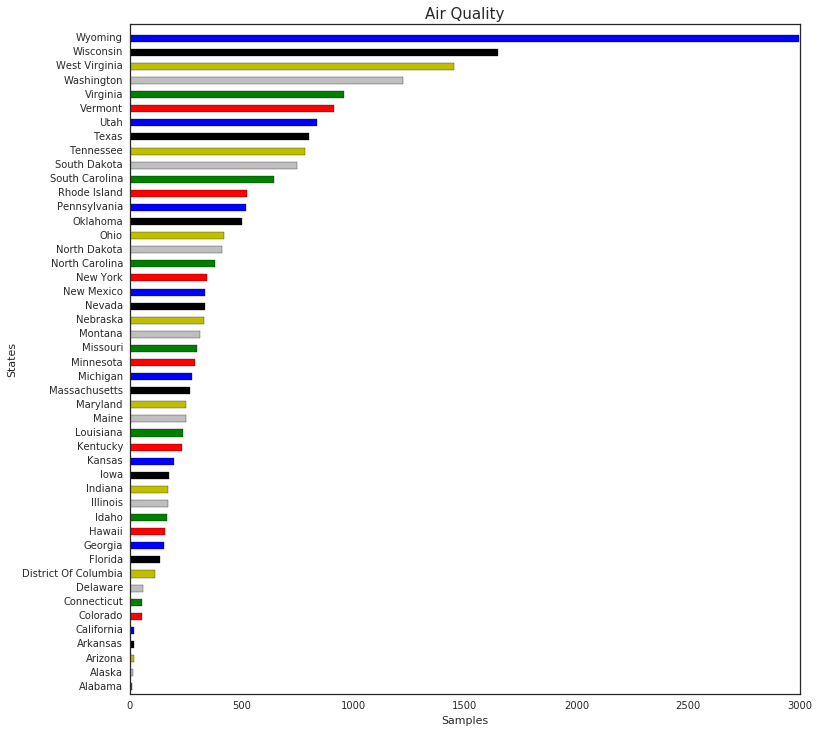

In [38]:
states = airQuality_df.groupBy('State Name').count().sort('count').toPandas().iloc[1:,:]
#states = airQuality_df.groupby(['State Name']).max().toPandas().iloc[1:,:]

states['State Name'] = [u'Alabama', u'Alaska', u'Arizona', u'Arkansas', u'California', u'Colorado', u'Connecticut', u'Delaware', u'District Of Columbia', u'Florida', u'Georgia', u'Hawaii', u'Idaho', u'Illinois', u'Indiana', u'Iowa', u'Kansas', u'Kentucky', u'Louisiana', u'Maine', u'Maryland', u'Massachusetts', u'Michigan', u'Minnesota', u'Missouri', u'Montana', u'Nebraska', u'Nevada', u'New Mexico', u'New York', u'North Carolina', u'North Dakota', u'Ohio', u'Oklahoma', u'Pennsylvania', u'Rhode Island', u'South Carolina', u'South Dakota', u'Tennessee', u'Texas', u'Utah', u'Vermont', u'Virginia', u'Washington', u'West Virginia', u'Wisconsin', u'Wyoming']
#colors = ['g','0.75','y','k','b','r']
states.sort_values(by='count', ascending=True)['count'].plot.barh(color=colors)
#plt.figure(figsize=(15,10))
plt.xlabel('Samples')
plt.ylabel('States')
plt.title('Air Quality', size=15)
plt.yticks(range(0,48),states['State Name'])
plt.show()

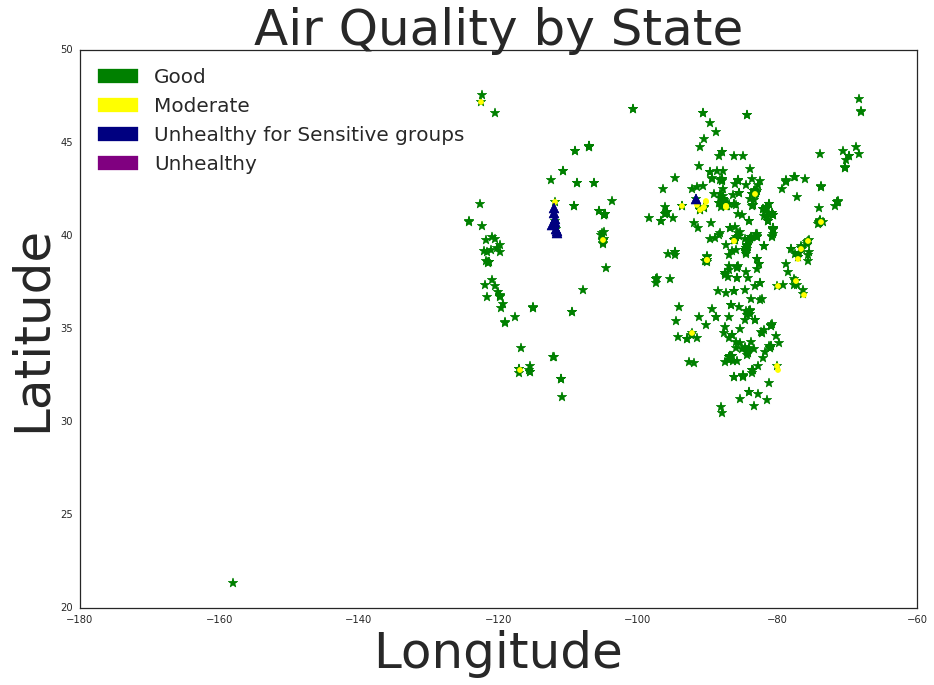

In [40]:
airQuality_pd['Observation Count'] = airQuality_pd['Observation Count'].astype(int)

alabama_25_Local_Conditions_filter1 = airQuality_pd[np.logical_and(airQuality_pd['Observation Count'] < 302, airQuality_pd['Parameter Name']=='PM2.5 - Local Conditions')]
alabama_25_Local_Conditions_filter2 = alabama_25_Local_Conditions_filter1[np.logical_and(alabama_25_Local_Conditions_filter1['Metric Used']=='Daily Mean', alabama_25_Local_Conditions_filter1['Sample Duration']=='24 HOUR')]

allStates_good = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] < 51,alabama_25_Local_Conditions_filter2['Observation Count'] < 51)]
allStates_moderate = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] > 51,alabama_25_Local_Conditions_filter2['Observation Count'] < 101)]
allStates_USG = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] > 101,alabama_25_Local_Conditions_filter2['Observation Count'] < 151)]
allStates_Unhealthy = alabama_25_Local_Conditions_filter2[np.logical_and(alabama_25_Local_Conditions_filter2['Observation Count'] > 150,alabama_25_Local_Conditions_filter2['Observation Count'] < 201)]

#size
plt.figure(figsize=(15,10))

#legend
green_patch = mpatches.Patch( label='Good', color='Green')
yellow_patch = mpatches.Patch(color='yellow', label='Moderate')
navy_patch = mpatches.Patch(color='navy', label='Unhealthy for Sensitive groups')
purple_patch = mpatches.Patch(color='purple', label='Unhealthy')
plt.legend([green_patch, yellow_patch, navy_patch, purple_patch],('Good', 'Moderate', 'Unhealthy for Sensitive groups', 'Unhealthy'), 
           loc='upper left', prop={'size':20})

#plot
plt.scatter(allStates_good.Longitude, allStates_good.Latitude, color='green', s=100, marker ='*')
plt.scatter(allStates_moderate.Longitude, allStates_moderate.Latitude, color='yellow', s=100, marker  = '.')
plt.scatter(allStates_USG.Longitude, allStates_USG.Latitude, color='navy', s=100, marker  = '^')
plt.scatter(allStates_Unhealthy.Longitude, allStates_Unhealthy.Latitude, color='purple', s=100, marker  = 'v')

plt.title('Air Quality by State', size=50)
plt.xlabel('Longitude',size=50)
plt.ylabel('Latitude',size=50)
plt.show()

[[u'Alabama' 30]
 [u'Arizona' 30]
 [u'Arkansas' 88]
 [u'California' 87]
 [u'Colorado' 78]
 [u'Delaware' 77]
 [u'Georgia' 25]
 [u'Hawaii' 28]
 [u'Idaho' 4]
 [u'Illinois' 58]
 [u'Indiana' 60]
 [u'Iowa' 117]
 [u'Kansas' 30]
 [u'Kentucky' 11]
 [u'Maine' 24]
 [u'Maryland' 78]
 [u'Michigan' 87]
 [u'Missouri' 30]
 [u'Nebraska' 30]
 [u'Nevada' 30]
 [u'New York' 70]
 [u'North Carolina' 30]
 [u'North Dakota' 30]
 [u'Ohio' 30]
 [u'Oklahoma' 30]
 [u'Rhode Island' 21]
 [u'South Carolina' 62]
 [u'Tennessee' 28]
 [u'Utah' 120]
 [u'Virginia' 90]
 [u'Washington' 57]
 [u'West Virginia' 30]
 [u'Wisconsin' 28]
 [u'Wyoming' 15]]


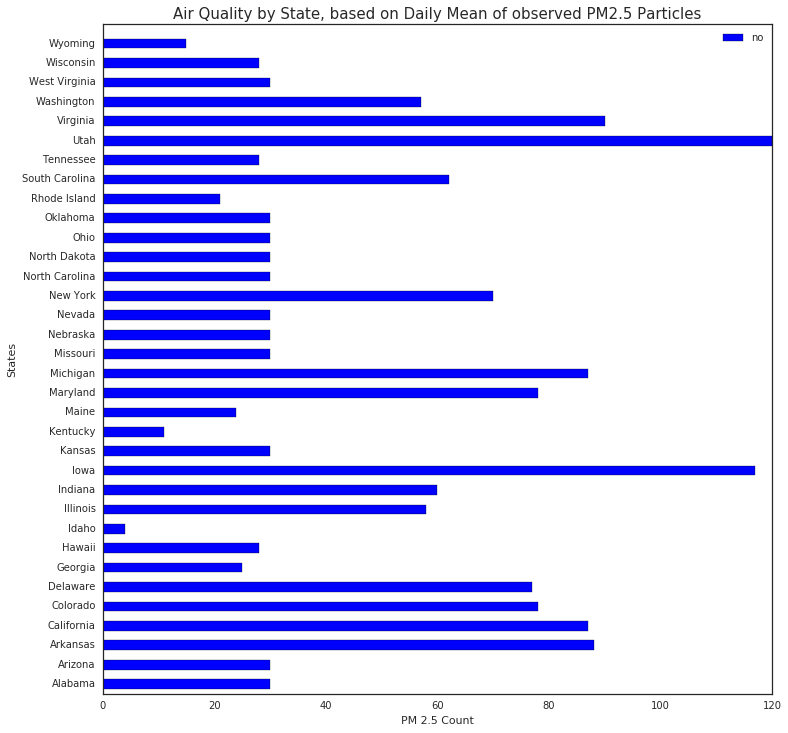

In [104]:
airQuality_pd['Observation Count'] = airQuality_pd['Observation Count'].astype(int)

allStates_Local_Conditions_filter1 = airQuality_pd[np.logical_and(airQuality_pd['Pollutant Standard']== 'PM25 24-hour 2012', airQuality_pd['Parameter Name']=='PM2.5 - Local Conditions')]
allStates_Local_Conditions_filter2 = allStates_Local_Conditions_filter1[np.logical_and(allStates_Local_Conditions_filter1['Metric Used']=='Daily Mean', allStates_Local_Conditions_filter1['Sample Duration']=='24 HOUR')]

allS = allStates_Local_Conditions_filter2.groupby('State Name', as_index=False)['Observation Count'].agg({'no':'max'})
print allS.values

allS.plot.barh(color='b')
plt.xlabel('PM 2.5 Count')
plt.ylabel('States')
plt.title('Air Quality by State, based on Daily Mean of observed PM2.5 Particles', size=15)
plt.yticks(range(0,35),allS['State Name'])
plt.show()